# Project Definition

The goal of this project will be to predict the target class of the anonymous features of the provided data set. Exploratory Data Analysis will be minimal because we don't actually know what any of the columns represent.

# Initiation

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#metrics
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df = pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Because the data is confidential, we'll just use a pairplot to get a general idea of how each feature interfaces with the others.


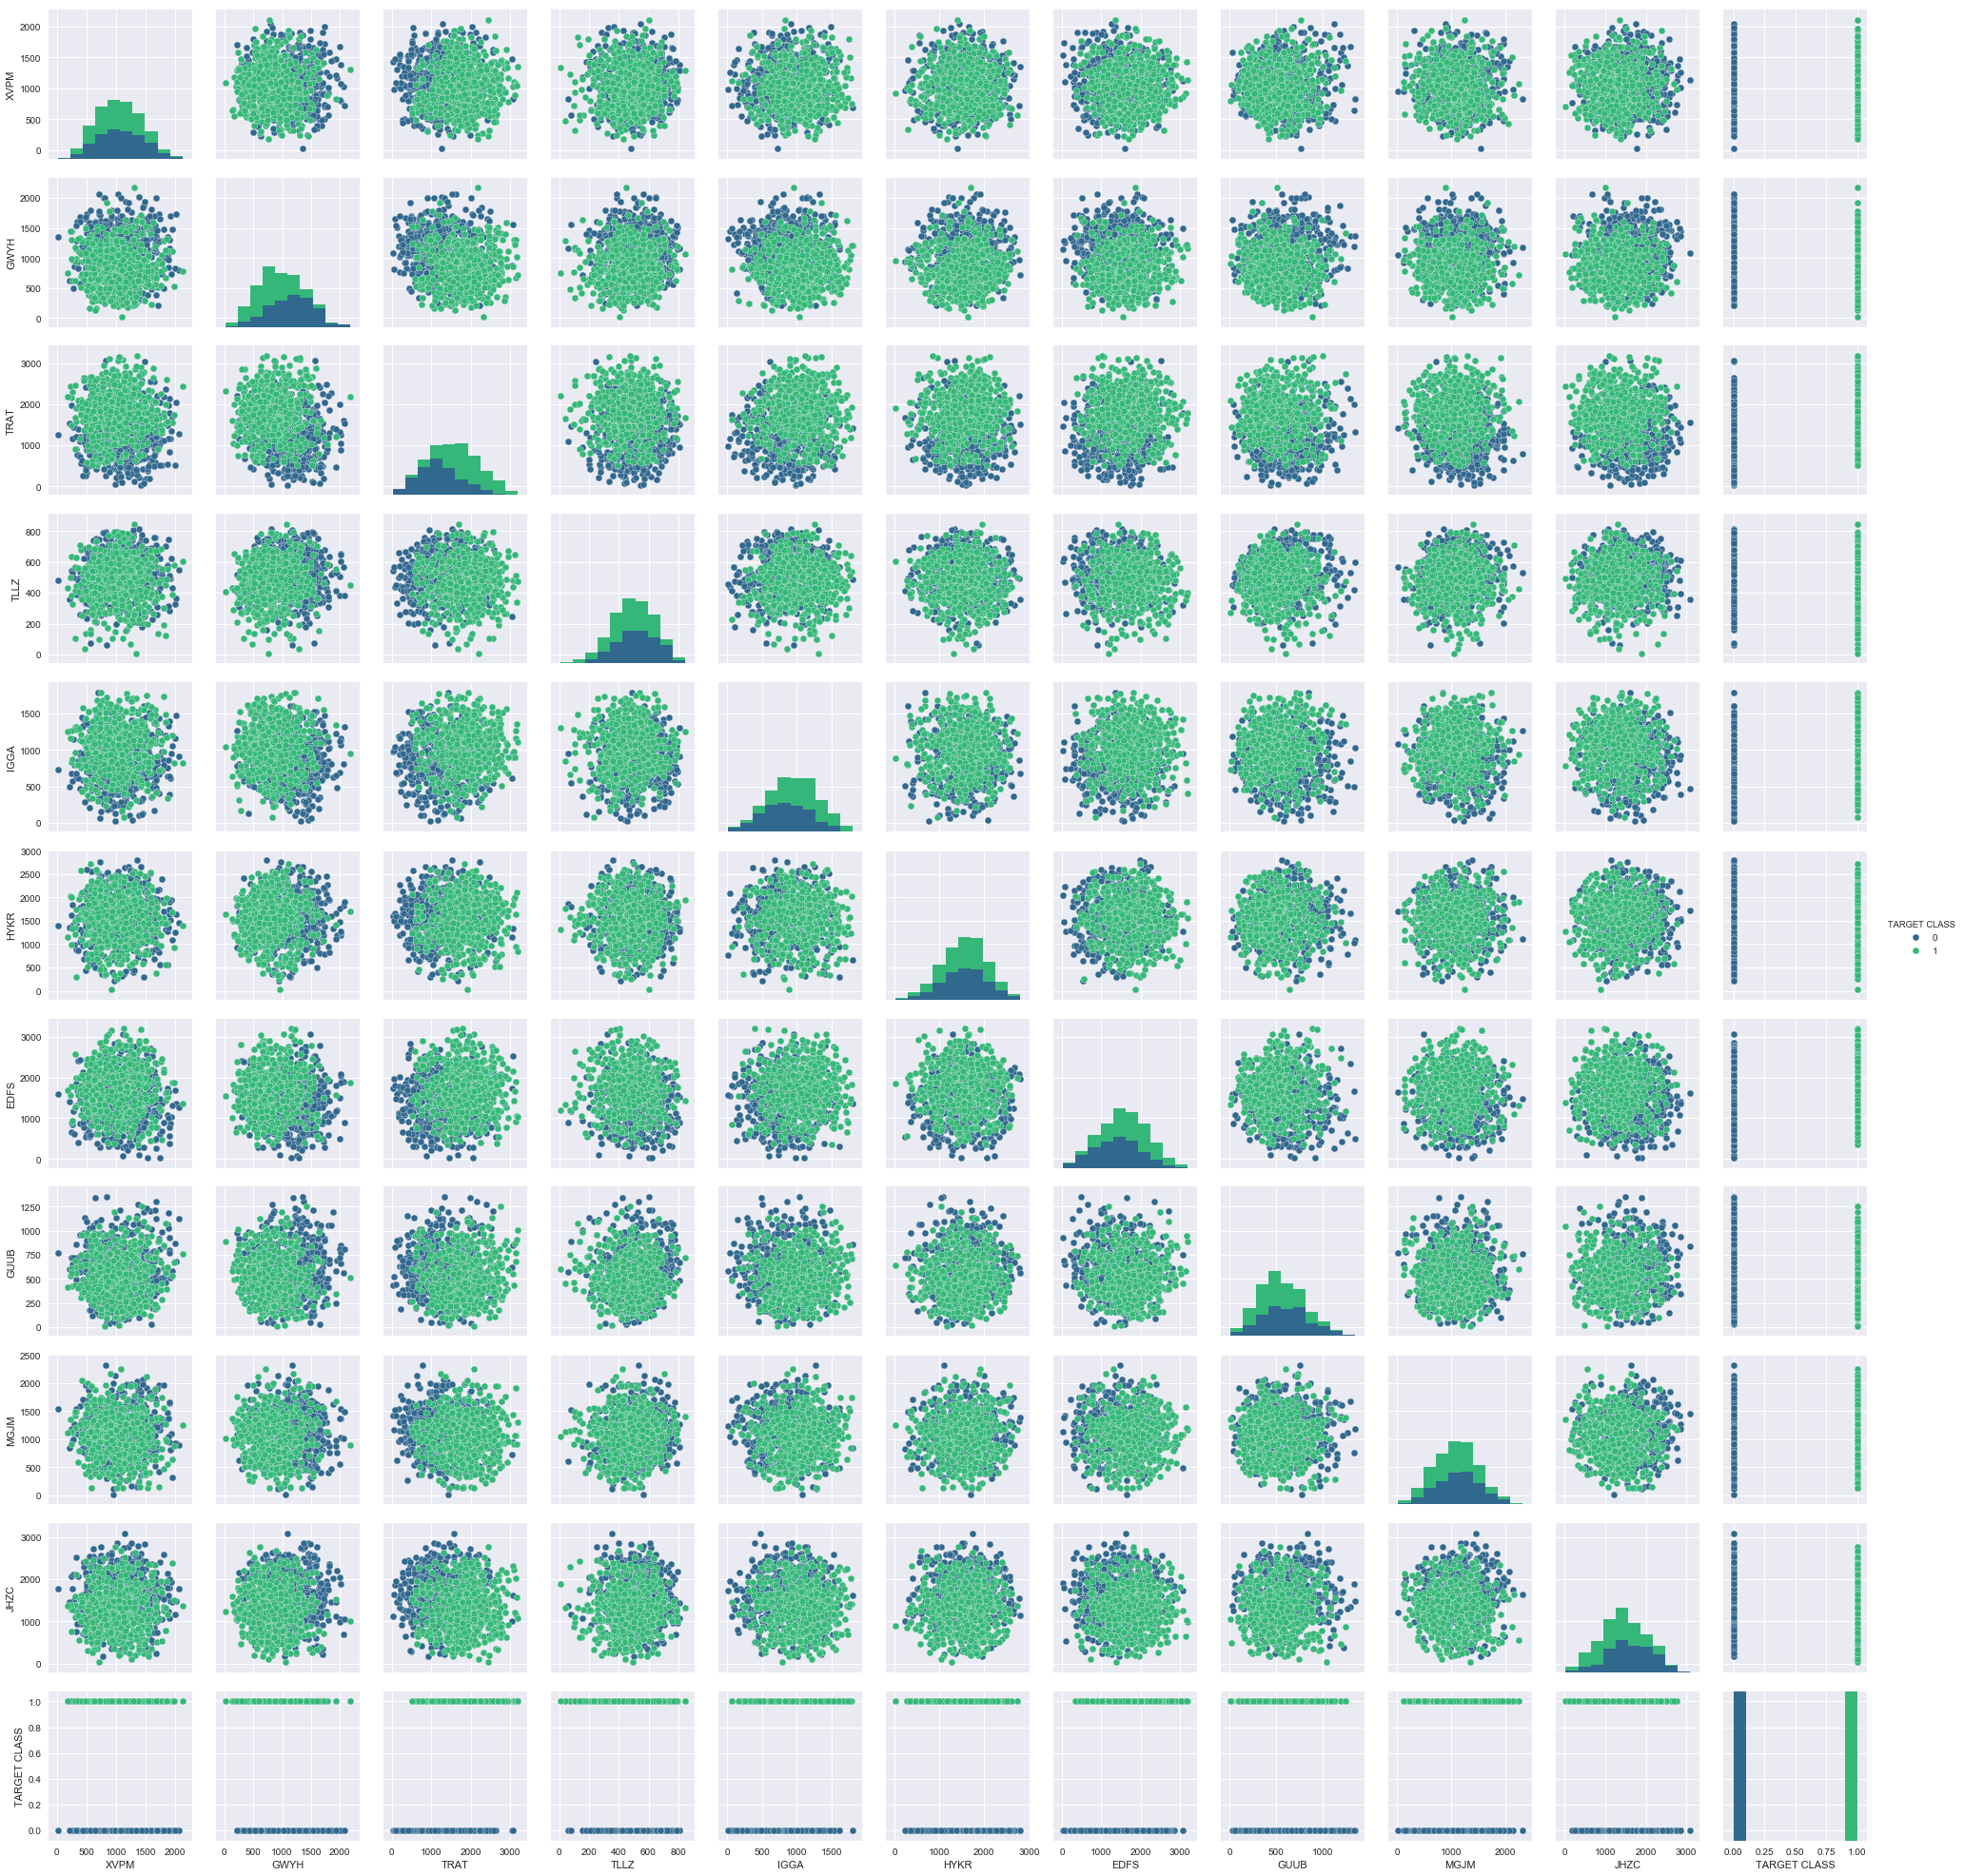

In [4]:
sns.pairplot(df, hue='TARGET CLASS', palette='viridis')

# Data Preparation

## Standardize the Variables

The KNN Classifier is very sensitive to the scale of the variables. If one column has a range of 1 to 1000, while another is 1 to 2, the first column's effect on the algorithm will be dramatic in comparison. To remedy that problem, we'll use a standard scaler to scale the data.

In [7]:
#Create StandardScaler object
scaler = StandardScaler()

#fit the scaler to the features (drop the target class)
scaler.fit(df.drop('TARGET CLASS',axis=1))

#using the transform() method, we'll convert the features into scaled features
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [9]:
#[:-1] uses all columns except the last one
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Model Training and Predictions

In [10]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['TARGET CLASS'], test_size=0.30)

In [11]:
#Create a KNN model instance with K=1 to start
knn = KNeighborsClassifier(n_neighbors=1)

#fit the model to the training data
knn.fit(X_train, y_train)

#predictions
pred = knn.predict(X_test)

In [13]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[108  35]
 [ 38 119]]


             precision    recall  f1-score   support

          0       0.74      0.76      0.75       143
          1       0.77      0.76      0.77       157

avg / total       0.76      0.76      0.76       300



## Choosing a K Value

We can optimize the KNN model by choosing a better K Value. A good way to evaluate the effectiveness of each K Value is by usng the elbow method.

The elbow method involves creating a for loop that trains various KNN models with different K values, then keeps track of the error_rate for each of these models with a list.

In [15]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i) #create knn instance with i neighbors
    knn.fit(X_train, y_train) #fit new model to training data
    pred_i = knn.predict(X_test) #predicitions using K = i
    error_rate.append(np.mean(pred_i != y_test)) #error rate list appended with average error_rate when the prediction 
                                                 #is not equal to the truth

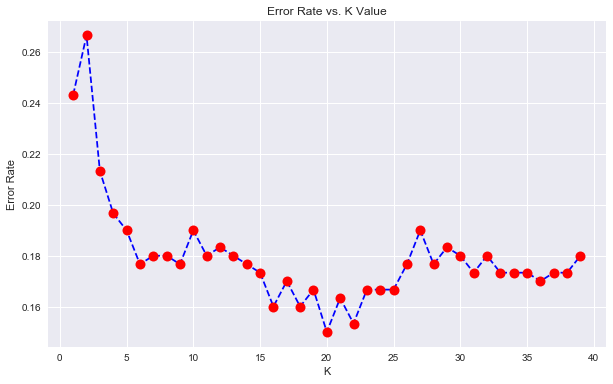

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We can see that the error rate hits a minimum at K=20, however the optimal K value depends on the situation. If we're trying to squeeze out as much accuracy as possible without worrying about resources or run time, then we can go with the optimal value. However, if we can choose a much lower K value for a small hit to accuracy comparatively, that might be the best option. 

## Retrain with new K Value

In [17]:
# NOW WITH K=20
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[121  22]
 [ 23 134]]


             precision    recall  f1-score   support

          0       0.84      0.85      0.84       143
          1       0.86      0.85      0.86       157

avg / total       0.85      0.85      0.85       300



In [18]:
# NOW WITH K=16
knn = KNeighborsClassifier(n_neighbors=16)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=16')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=16


[[122  21]
 [ 27 130]]


             precision    recall  f1-score   support

          0       0.82      0.85      0.84       143
          1       0.86      0.83      0.84       157

avg / total       0.84      0.84      0.84       300



Dropping the K value by 4 cost us 1% of accuracy on average, is it worth it?

# Conclusion

KNN models can be a powerful tool for quick data analysis and prediction. Optimizing this model to some degree is much easier to conceptualize comapred to other classifiers. 